# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset ini berisi data statistik pemain pada data di game EAFC26, di mana data ini meliputi statistik pemain, asal pemain (team, liga, negara), umur, posisi, dan keahlian pemain. Dataset ini didapat dari kaggle dengan tautan berikut: https://www.kaggle.com/datasets/flynn28/eafc26-player-database. Proyek ini bertujuan untuk memprediksi nilai OVR (Overall Player Rattings), berdasarkan statistik dasar pemain.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [10]:
#Type your code here
df = pd.read_csv(r'C:\Users\User\Documents\ASAH DICODING\SMSML_MuhammadRizkySaepulPutra\Eksperimen_SML_MuhammadRizkySaepulPutra\EAFC26_raw.csv')
df.head()

,ID,Rank,Name,GENDER,OVR,PAC,SHO,PAS,DRI,DEF,...,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,card
0,209331,1,Mohamed Salah,M,91,89,88,86,90,45,...,Premier League,Liverpool,"['Finesse Shot+', 'First Touch', 'Gamechanger'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
1,227203,2,Alexia Putellas,F,91,82,89,90,91,72,...,Liga F Moeve,FC Barcelona,"['First Touch+', 'Finesse Shot', 'Gamechanger'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
2,231747,3,Kylian Mbappé,M,91,97,90,81,92,37,...,LALIGA EA SPORTS,Real Madrid,"['Quick Step+', 'Acrobatic', 'Finesse Shot', '...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
3,241667,4,Aitana Bonmatí,F,91,85,87,86,91,77,...,Liga F Moeve,FC Barcelona,"['Technical+', 'First Touch', 'Incisive Pass',...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
4,231443,5,Ousmane Dembélé,M,90,91,88,83,93,50,...,Ligue 1 McDonald's,Paris SG,"['Rapid+', 'Inventive', 'Low Driven Shot', 'Pi...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...


In [11]:
df.shape

(17873, 59)

In [12]:
df.columns

Index(['ID', 'Rank', 'Name', 'GENDER', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'Acceleration', 'Sprint Speed', 'Positioning',
       'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties',
       'Vision', 'Crossing', 'Free Kick Accuracy', 'Short Passing',
       'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions',
       'Ball Control', 'Composure', 'Interceptions', 'Heading Accuracy',
       'Def Awareness', 'Standing Tackle', 'Sliding Tackle', 'Jumping',
       'Stamina', 'Strength', 'Aggression', 'Position', 'Weak foot',
       'Skill moves', 'Preferred foot', 'Height', 'Weight',
       'Alternative positions', 'Age', 'Nation', 'League', 'Team',
       'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'card'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17873 entries, 0 to 17872
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     17873 non-null  int64  
 1   Rank                   17873 non-null  int64  
 2   Name                   17873 non-null  object 
 3   GENDER                 17873 non-null  object 
 4   OVR                    17873 non-null  int64  
 5   PAC                    17873 non-null  int64  
 6   SHO                    17873 non-null  int64  
 7   PAS                    17873 non-null  int64  
 8   DRI                    17873 non-null  int64  
 9   DEF                    17873 non-null  int64  
 10  PHY                    17873 non-null  int64  
 11  Acceleration           17873 non-null  int64  
 12  Sprint Speed           17873 non-null  int64  
 13  Positioning            17873 non-null  int64  
 14  Finishing              17873 non-null  int64  
 15  Sh

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

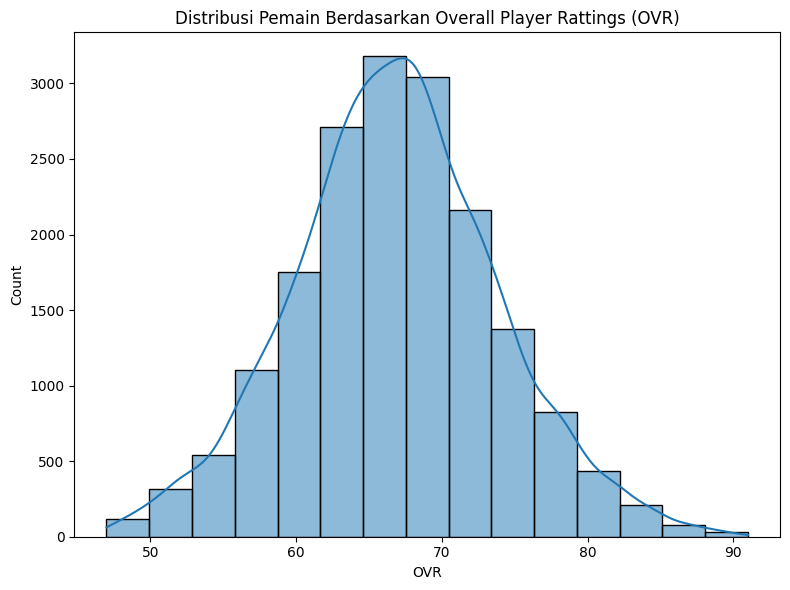

In [14]:
#Type your code here
plt.figure(figsize=(8,6))
sns.histplot(df["OVR"], bins=15, kde=True)
plt.title("Distribusi Pemain Berdasarkan Overall Player Rattings (OVR)")
plt.tight_layout()
plt.show()

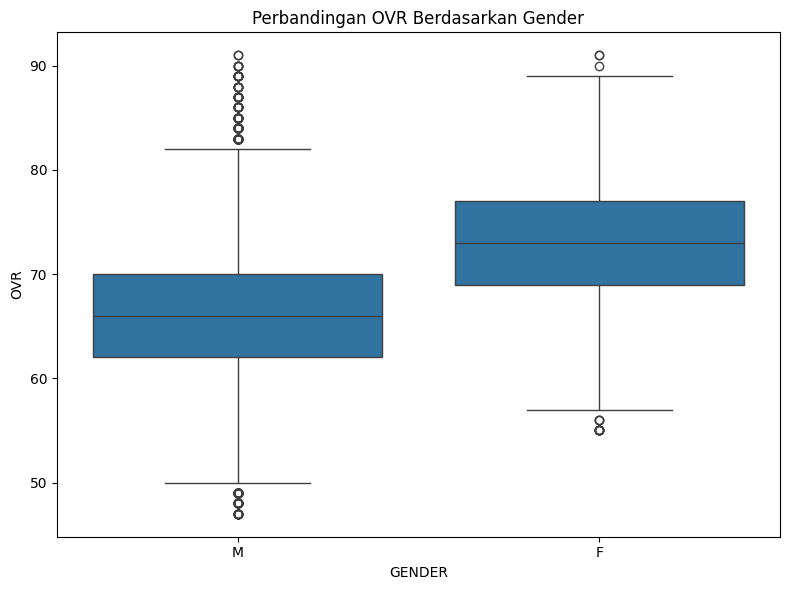

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="GENDER", y="OVR", data=df)
plt.title("Perbandingan OVR Berdasarkan Gender")
plt.tight_layout()
plt.show()

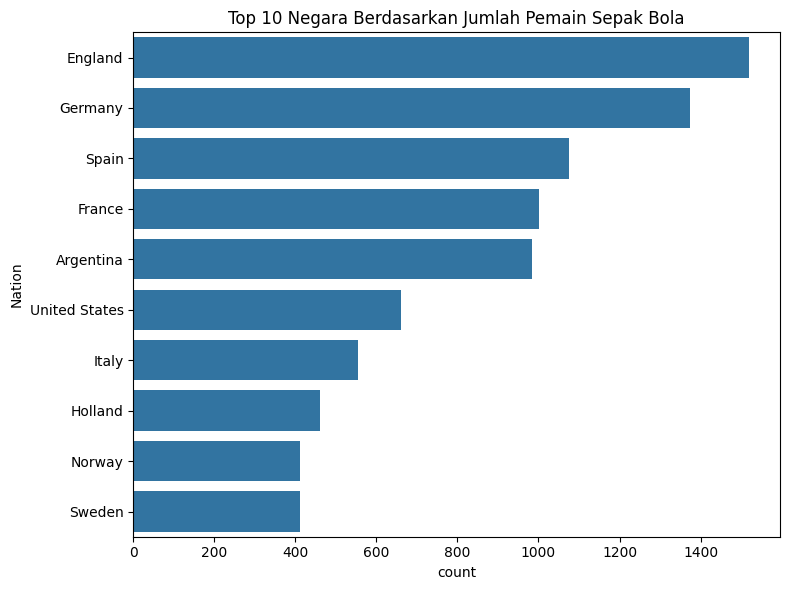

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(y='Nation', data=df, order=df['Nation'].value_counts().head(10).index)
plt.title("Top 10 Negara Berdasarkan Jumlah Pemain Sepak Bola")
plt.tight_layout()
plt.show()

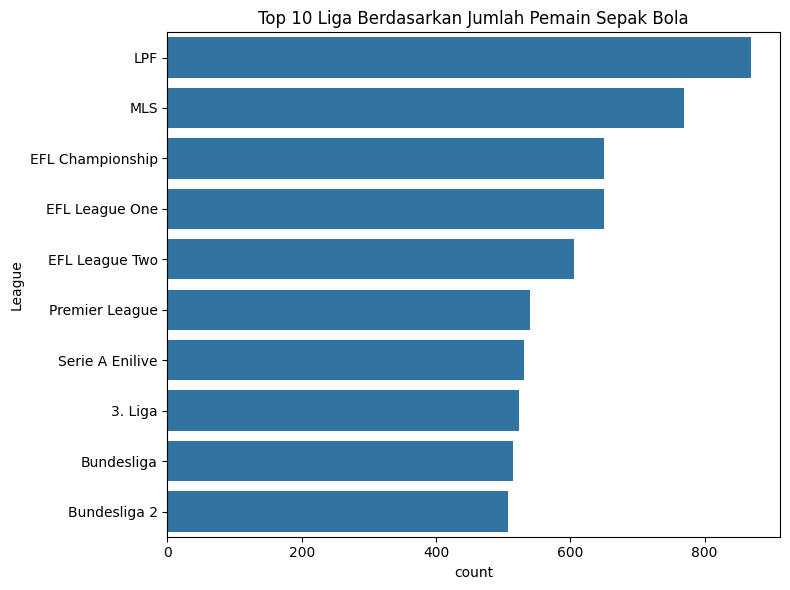

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(y='League', data=df, order=df['League'].value_counts().head(10).index)
plt.title("Top 10 Liga Berdasarkan Jumlah Pemain Sepak Bola")
plt.tight_layout()
plt.show()

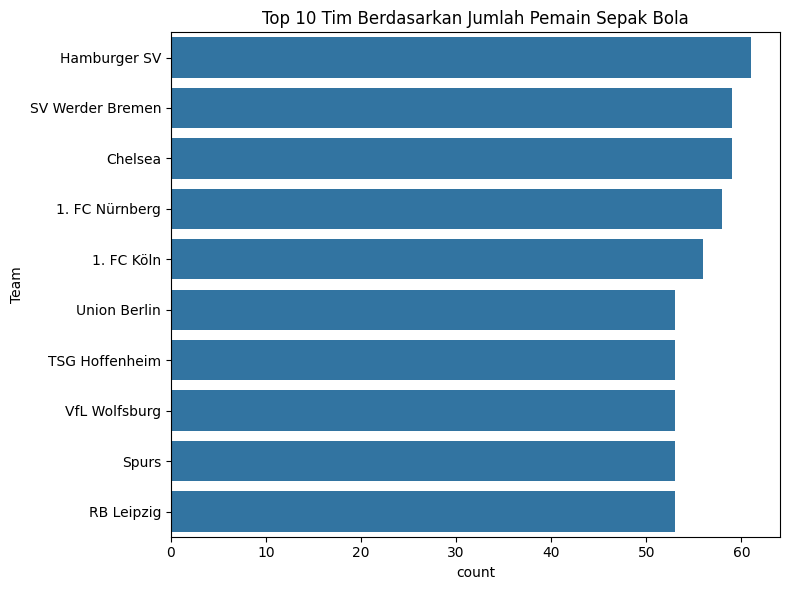

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(y='Team', data=df, order=df['Team'].value_counts().head(10).index)
plt.title("Top 10 Tim Berdasarkan Jumlah Pemain Sepak Bola")
plt.tight_layout()
plt.show()

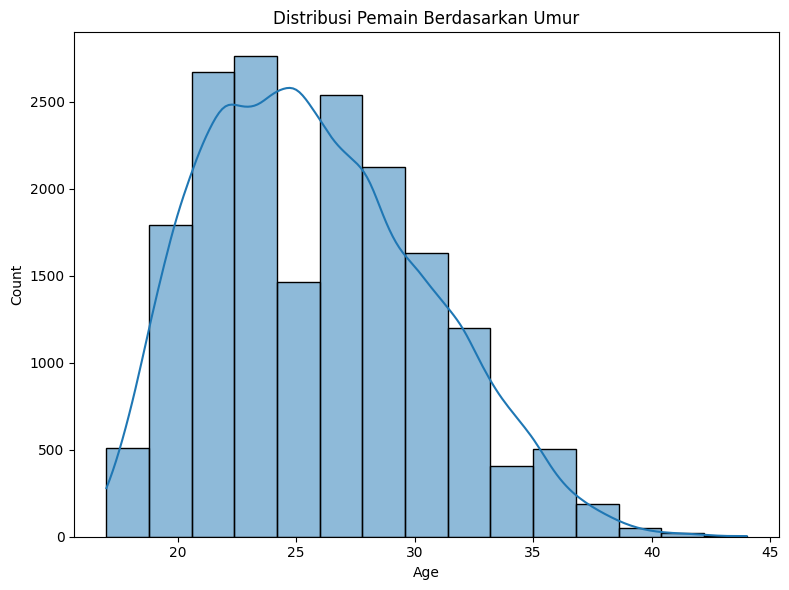

In [19]:
#Type your code here
plt.figure(figsize=(8,6))
sns.histplot(df["Age"], bins=15, kde=True)
plt.title("Distribusi Pemain Berdasarkan Umur")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [20]:
df.isnull().sum()

ID                           0
Rank                         0
Name                         0
GENDER                       0
OVR                          0
PAC                          0
SHO                          0
PAS                          0
DRI                          0
DEF                          0
PHY                          0
Acceleration                 0
Sprint Speed                 0
Positioning                  0
Finishing                    0
Shot Power                   0
Long Shots                   0
Volleys                      0
Penalties                    0
Vision                       0
Crossing                     0
Free Kick Accuracy           0
Short Passing                0
Long Passing                 0
Curve                        0
Dribbling                    0
Agility                      0
Balance                      0
Reactions                    0
Ball Control                 0
Composure                    0
Interceptions                0
Heading 

In [21]:
df = df[~df['Position'].str.contains('GK', na=False)]

In [22]:
df.drop(columns=['Alternative positions', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'GK Diving', 'url', 'card', 'play style', 'Height', 'Weight', 'ID', 'Rank', 'Name', 'GENDER', 'Position', 'Preferred foot', 'Nation', 'League', 'Team', 'Age'], inplace=True)

In [23]:
df.isnull().sum()

OVR                   0
PAC                   0
SHO                   0
PAS                   0
DRI                   0
DEF                   0
PHY                   0
Acceleration          0
Sprint Speed          0
Positioning           0
Finishing             0
Shot Power            0
Long Shots            0
Volleys               0
Penalties             0
Vision                0
Crossing              0
Free Kick Accuracy    0
Short Passing         0
Long Passing          0
Curve                 0
Dribbling             0
Agility               0
Balance               0
Reactions             0
Ball Control          0
Composure             0
Interceptions         0
Heading Accuracy      0
Def Awareness         0
Standing Tackle       0
Sliding Tackle        0
Jumping               0
Stamina               0
Strength              0
Aggression            0
Weak foot             0
Skill moves           0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.describe()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves
count,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000,...,15859.000000,15859.000000,15859.000000,15859.000000,15859.00000,15859.000000,15859.000000,15859.000000,15859.000000,15859.000000
mean,67.034618,68.605776,53.888581,58.825714,63.958572,53.211489,65.517687,68.499149,68.667886,57.033546,...,57.590579,51.807176,54.234882,51.404502,67.97049,67.791286,66.130084,60.392900,2.996658,2.567186
std,6.948952,10.678866,14.049698,9.917729,9.336318,16.221242,9.526049,11.220951,11.045292,14.463875,...,11.511773,17.777549,17.993665,17.931443,11.39262,11.123293,12.161607,12.877418,0.654101,0.646067
min,47.000000,30.000000,21.000000,25.000000,29.000000,15.000000,32.000000,29.000000,30.000000,15.000000,...,24.000000,10.000000,10.000000,10.000000,27.00000,27.000000,28.000000,24.000000,1.000000,2.000000
25%,63.000000,63.000000,44.000000,52.000000,59.000000,40.000000,59.000000,62.000000,63.000000,49.000000,...,49.000000,38.000000,40.000000,37.000000,61.00000,61.000000,58.000000,52.000000,3.000000,2.000000
50%,67.000000,69.000000,56.000000,59.000000,65.000000,58.000000,66.000000,69.000000,69.000000,60.000000,...,58.000000,57.000000,60.000000,57.000000,69.00000,68.000000,67.000000,62.000000,3.000000,2.000000
75%,71.000000,76.000000,64.000000,66.000000,70.000000,65.000000,73.000000,76.000000,76.000000,67.000000,...,66.000000,65.000000,68.000000,65.000000,76.00000,75.000000,75.000000,70.000000,3.000000,3.000000
max,91.000000,97.000000,92.000000,92.000000,93.000000,90.000000,91.000000,97.000000,97.000000,95.000000,...,94.000000,91.000000,91.000000,89.000000,95.00000,95.000000,95.000000,94.000000,5.000000,5.000000


In [26]:
df.head()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves
0,91,89,88,86,90,45,76,88,89,93,...,59,38,43,41,79,88,75,63,3,4
1,91,82,89,90,91,72,80,81,82,91,...,74,60,81,64,85,85,81,70,5,5
2,91,97,90,81,92,37,76,97,97,91,...,78,26,34,32,90,83,77,61,4,5
3,91,85,87,86,91,77,75,84,86,91,...,54,75,81,67,76,82,75,64,5,4
4,90,91,88,83,93,50,69,93,89,95,...,74,49,49,39,84,76,69,58,5,5


In [27]:
df.to_csv("EAFC26_preprocessing.csv", index=False)